In [8]:
import tensorflow as tf
import numpy as np

# 激活函数
[官网点这里](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn/activation_functions_)

In [2]:
tf.nn.relu
tf.sigmoid
tf.tanh

<function tensorflow.python.ops.math_ops.tanh>

In [3]:
# a=tf.nn.relu(tf.matmul(x,w1)+biases1)
# y=tf.nn.relu(tf.matmul(a,w2)+biases2)

### 1. dropout
可以减轻overfitting

In [ ]:
keep_prob=tf.placeholder(tf.float32)#训练时小于1，预测时等于1，所以使用placeholder
hidden1_drop=tf.nn.dropout(hidden1,keep_prob)

### 2. CNN相关

In [ ]:
tf.nn.conv2d(x,kernel,strides=[1,1,1,1],padding='SAME')
#strides[0,1]数表示卷积核的尺寸，
#stride[2]表示channel数量，灰度图片是1，RGB图是3
#stride[3]表示卷积核的数量
#padding='SAME'表示边界加上padding，使得卷积的输入和输出保持同样的尺寸

tf.nn.max_pool(x,ksize=[1,2,2,1],strides=[1,2,2,1],padding='SAME')#横竖步长为2，

In [ ]:
tf.nn.lrn(pool1,4,bias=1,alpha=0.001/9.0,beta=0.75)
#LRN模仿生物的侧抑制机制，对局部神经元创建竞争环境，使其中响应大的值相对更大，并抑制其它反馈小的神经元。从而增强泛化能力
#可以用于Pooling之后，也可以用于conv之后、Pooling之前
#适用于ReLu这种没有上界的激活函数，不适合Sigmoid这种有固定边界，或者能抑制过大值得激活函数

batch归一化

In [ ]:
h1=tf.contrib.layers.fully_connected(x,100,activation_fn=None,scope='bn')
h2=tf.contrib.layers.batch_norm(h1,center=True,scale=True,is_training=phase,scope='bn')

# 优化器
[官网](https://www.tensorflow.org/api_docs/python/tf/train)还有[这里](https://www.tensorflow.org/api_guides/python/train)

In [4]:
tf.train.GradientDescentOptimizer # 如果每次只传入batch，那么就变成随机梯度下降
tf.train.AdadeltaOptimizer

# 下面两个是常用的高阶Optimizer
tf.train.MomentumOptimizer # 学习率不只是考虑这一次的学习趋势，而且考虑上一次的学习趋势
tf.train.AdamOptimizer

tf.train.RMSPropOptimizer # alpha go所使用的优化器

tensorflow.python.training.rmsprop.RMSPropOptimizer

# 建立神经网络
## 1.准备数据

In [9]:
x_data=np.linspace(-1,1,300).reshape(-1,1)
noise=np.random.normal(0,0.05,x_data.shape)
y_data=np.square(x_data)-0.5+noise

## 2. 建立一个层

In [6]:
def add_layer(inputs,in_size,out_size,activation_function=None):
    weights=tf.Variable(tf.random_normal((in_size,out_size)))
    biases=tf.Variable(tf.zeros(shape=(1,out_size))+0.1) #因为bias初始最好不为0
    wx_plus_b=tf.matmul(inputs,weights)+biases
    if activation_function is None:
        outputs=wx_plus_b
    else:
        outputs=activation_function(wx_plus_b)
    return outputs

## 3. 建立所有层

In [7]:
xs=tf.placeholder(shape=(None,1),dtype=tf.float32)
ys=tf.placeholder(shape=(None,1),dtype=tf.float32)
layer_1=add_layer(xs,1,10,activation_function=tf.nn.relu)
prediction=add_layer(layer_1,10,1,activation_function=None)

## 3.损失函数

In [8]:
loss=tf.reduce_mean(tf.reduce_sum(tf.square(ys-prediction),reduction_indices=[1]))
train_step=tf.train.GradientDescentOptimizer(0.1).minimize(loss)

## 4. 训练

In [9]:
init=tf.global_variables_initializer()
sess=tf.Session()
sess.run(init)

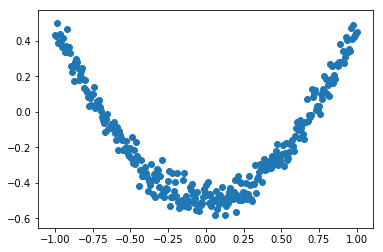

0.196167
0.0120932
0.00790618
0.00752522
0.00719032
0.00663895
0.00608449
0.00562756
0.00534235
0.00515861
0.00499764
0.00486557
0.00476097
0.00466958
0.00458892
0.00451697
0.00444158
0.00435402
0.00427093
0.00419756


In [10]:
#(暂时没找到jupyter画动画的方法，建议用pycharm之类)
import matplotlib.pyplot as plt
fig=plt.figure()
ax=fig.add_subplot(111)
ax.scatter(x_data,y_data)
plt.ion()
plt.show()
for i in range(1000):
    sess.run(train_step,feed_dict={xs:x_data,ys:y_data})
    if i%50==0:
        print(sess.run(loss,feed_dict={xs:x_data,ys:y_data}))
        try:
            ax.lines.remove(lines[0])
        except Exception:
            pass
        y_predict=sess.run(prediction,feed_dict={xs:x_data})
        lines=ax.plot(x_data,y_predict,'r-',lw=5)
        plt.pause(0.1)

# 可视化整个网络

In [1]:
import tensorflow as tf
with tf.name_scope('inputs'): # 'inputs'是一层的名字
    xs=tf.placeholder(shape=(None,1),dtype=tf.float32,name='x_input') # 'x_input'也是图里的名字
    ys=tf.placeholder(shape=(None,1),dtype=tf.float32,name='y_input')


def add_layer(inputs,in_size,out_size,activation_function=None):
    with tf.name_scope('layer'):
        with tf.name_scope('weights'):
            weights=tf.Variable(tf.random_normal((in_size,out_size)),name='W')
        with tf.name_scope('biases'):
            biases=tf.Variable(tf.zeros(shape=(1,out_size))+0.1,name='b') #因为bias初始最好不为0
        with tf.name_scope('wx_plus_b'):
            wx_plus_b=tf.matmul(inputs,weights)+biases
    if activation_function is None:
        outputs=wx_plus_b
    else:
        outputs=activation_function(wx_plus_b) #不用给name，因为会自动给出
    return outputs

In [2]:
layer_1=add_layer(xs,1,10,activation_function=tf.nn.relu)
prediction=add_layer(layer_1,10,1,activation_function=None)

In [3]:
with tf.name_scope('loss'):
    loss=tf.reduce_mean(tf.reduce_sum(tf.square(ys-prediction),reduction_indices=[1])) #也可以加name
with tf.name_scope('train'):
    train_step=tf.train.GradientDescentOptimizer(0.1).minimize(loss)    

In [10]:
sess=tf.Session()
writer=tf.summary.FileWriter('file/',sess.graph) #logs文件夹

sess.run(tf.global_variables_initializer())
sess.run(prediction,feed_dict={xs:x_data})
writer.close()

In [ ]:
#$ tensorboard --logdir='test/'

# 损失函数
#### 1.交叉熵
$H(p,q)=-\sum p(x)\log q(x)$

In [ ]:
cross_entropy=-tf.reduce_mean(y_*tf.log(tf.clip_by_value(y,1e-10,1.0)))
# y_代表正确结果，y代表预测结果
# tf.clip_by_value可以把张量中的数值限制在某个范围内,这里为了防止log0报错
# reduce_mean:大概是求均值？

In [ ]:
# TensorFlow对softmax+crossentropy进行了封装
cross_entropy=tf.nn.softmax_cross_entropy_with_logits(y,y_)

#### 2.MSE
$MSE(y,y')=\dfrac{\sum (y-y')^2}{n}$

In [ ]:
mse=tf.reduce_mean(tf.square(y_-y))

#### 3.自定义
例如，预测销量时，多预测一个损失1元，少预测1个损失10元。  
$Loss(y,y')=\sum f(y_i,y_i')$,
$f(x,y)=\left\{\begin{array}{ccc}a(x-y)&x>y\\
b(y-x)&x\leq y\end{array}\right.$

In [ ]:
loss=tf.reduce_sum(tf.select(tf.greater(v1,v2),(v1-v2)*a,(v2-v1)*b))


# 学习率
decayed_learning_rate=learning_rate * decay_rate ** (global_step/decay_steps)
```
tf.train.exponential_decay# 指数下降法减小学习率
learning_rate=tf.train.exponential_decay(0.01,global_step=10000,decay_steps=100,decay_rate=0.96,staircase=True)
```
staircase=True时，(global_step/decay_steps)会转化成整数，导致学习率阶梯下降

In [2]:
import tensorflow as tf
TRAINING_STEPS = 100
global_step = tf.Variable(0)
LEARNING_RATE = tf.train.exponential_decay(0.1, global_step, 1, 0.96, staircase=True)

x = tf.Variable(tf.constant(5, dtype=tf.float32), name="x")
y = tf.square(x)
train_op = tf.train.GradientDescentOptimizer(LEARNING_RATE).minimize(y, global_step=global_step)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(TRAINING_STEPS):
        sess.run(train_op)
        if i % 10 == 0:
            LEARNING_RATE_value = sess.run(LEARNING_RATE)
            x_value = sess.run(x)
            print ("After %s iteration(s): x%s is %f, learning rate is %f."% (i+1, i+1, x_value, LEARNING_RATE_value))

After 1 iteration(s): x1 is 4.000000, learning rate is 0.096000.
After 11 iteration(s): x11 is 0.690561, learning rate is 0.063824.
After 21 iteration(s): x21 is 0.222583, learning rate is 0.042432.
After 31 iteration(s): x31 is 0.106405, learning rate is 0.028210.
After 41 iteration(s): x41 is 0.065548, learning rate is 0.018755.
After 51 iteration(s): x51 is 0.047625, learning rate is 0.012469.
After 61 iteration(s): x61 is 0.038558, learning rate is 0.008290.
After 71 iteration(s): x71 is 0.033523, learning rate is 0.005511.
After 81 iteration(s): x81 is 0.030553, learning rate is 0.003664.
After 91 iteration(s): x91 is 0.028727, learning rate is 0.002436.


# 过拟合
cost Function加上L1 正则化或L2正则化  
其中L1正则化可以将某些参数变成0，从而使参数系数。  
L2不会使参数系数  
(原因参见lasso和ridge regression)


In [ ]:
loss=tf.reduce_mean(tf.square(y_-y))+tf.contrib.layers.l2_regularizer(alpha)(w)

# 滑动平均

#### 1. 定义变量及滑动平均类

In [3]:
import tensorflow as tf
v1 = tf.Variable(0, dtype=tf.float32)
step = tf.Variable(0, trainable=False)
ema = tf.train.ExponentialMovingAverage(0.99, step)
maintain_averages_op = ema.apply([v1]) 

#### 2. 查看不同迭代中变量取值的变化。
$\min (decay,\dfrac{1+num_{updates}}{10+num_{updates}})$
一般情况下，decay设定为一个非常接近1的数

In [4]:
with tf.Session() as sess:
    
    # 初始化
    init_op = tf.global_variables_initializer()
    sess.run(init_op)
    print (sess.run([v1, ema.average(v1)]))
    
    # 更新变量v1的取值
    sess.run(tf.assign(v1, 5))
    sess.run(maintain_averages_op)#decay=0.1
    print (sess.run([v1, ema.average(v1)])) #0.1*0+0.9*5=4.5
    
    # 更新step和v1的取值
    sess.run(tf.assign(step, 10000))  
    sess.run(tf.assign(v1, 10))
    sess.run(maintain_averages_op)#decay=0.99
    print (sess.run([v1, ema.average(v1)]) )      
    
    # 更新一次v1的滑动平均值
    sess.run(maintain_averages_op)
    print (sess.run([v1, ema.average(v1)])) 


[0.0, 0.0]
[5.0, 4.5]
[10.0, 4.5549998]
[10.0, 4.6094499]


# 正则化

- 加入collection

In [ ]:
weight_loss=tf.multiply(tf.nn.l2_loss(var),wl,name='weight_loss')#wl是L2_loss的系数
tf.add_to_collection('losses',weight_loss)#加入一个collection

- 正则化的和

In [ ]:
tf.add_n(tf.get_collection('losses'),name='total_loss')

把entropy也加入'losses'使代码简洁一些

In [ ]:
tf.add_to_collection('losses',cross_entropy)
tf.add_n(tf.get_collection('losses'),name='total_loss')